# K-means

Segmentação de imagem da placa petri com uma cultura de fungos. Deseja-se separar a imagen em 4 regiões (fungo, borda da placa, área interna da placa sem fungo, área exterior da placa)

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive'
os.chdir(path)


Esse código seguirá o exemplo dado em https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/


1) Importando a imagem

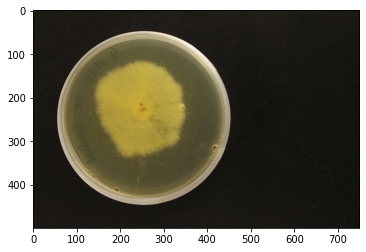

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread('Clustering/placaPetri.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

2) Redimensionar a imagem para array 2D como pede o k-means

In [4]:
image_reshape = image.reshape((-1,3))
 
# Convert to float type
image_reshape = np.float32(image_reshape)

3) Implementação do algoritmo k-means, com k = 4, pois se quer que indentifique 4 regiões na imagem

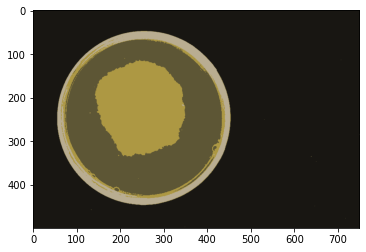

In [5]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 4
retval, labels, centers = cv2.kmeans(image_reshape, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)


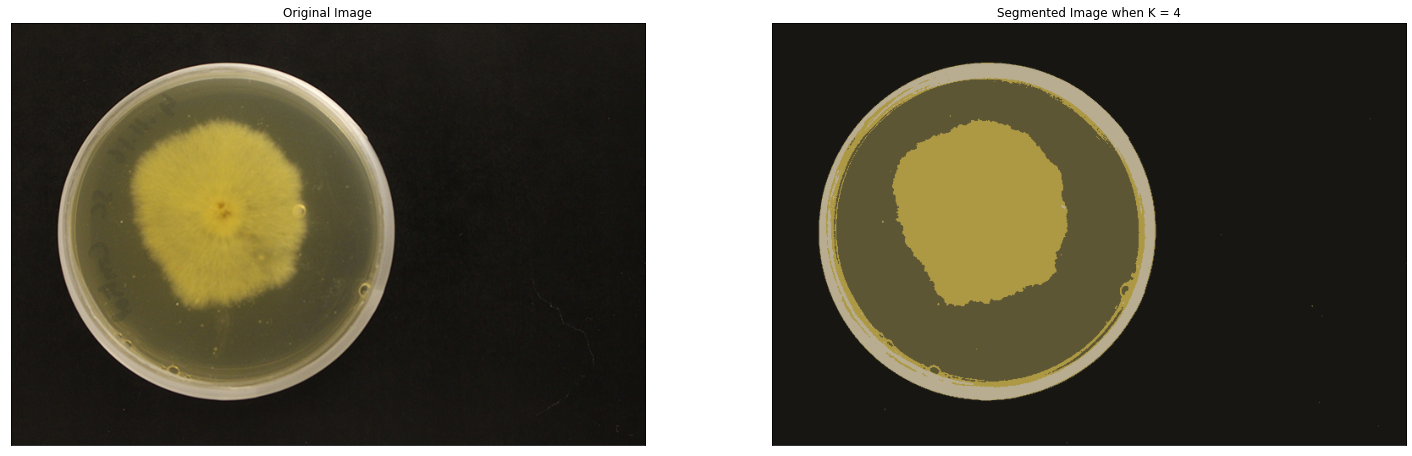

In [28]:
figure_size = 25
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(segmented_image)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

Comparando as duas imagens pode-se observar que o clustering foi feito e as regiões encontradas foram o fungo, borda da placa, área interna da placa sem fungo, área exterior da placa. Isso se observa devido a coloração das áreas da segunda imagem, as quais estão com um aspecto chapado de cor. Os critérios de 100 interações e 85% de acurácia foram suficientes para se encontrar o resultado desejado. 

Abaixo tem-se o critério mínimo para que fosse possível a segmentação desejada. 5 interações e acurácia de 10% já resolveria esse teste, tendo em vista que é uma imagem simples para o algoritmo. Mas essa margem de acurácia não seria aceitável para casos reais.

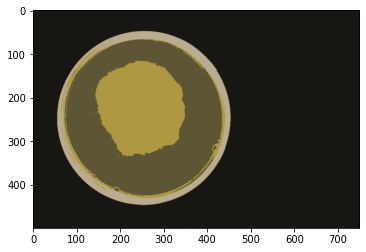

In [38]:

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5, 0.1)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 4
retval, labels, centers = cv2.kmeans(image_reshape, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)

# K-medoids

In [7]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from sklearn_extra.cluster import KMedoids
import numpy as np

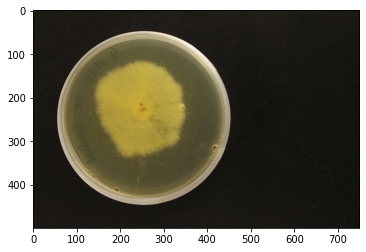

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread('Clustering/placaPetri.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [10]:
scale_percent = 30 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

print(image.shape, resized.shape)

(500, 750, 3) (150, 225, 3)


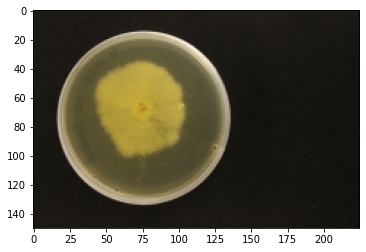

In [11]:
plt.imshow(resized)

In [12]:
image_reshape = resized.reshape((-1,3))
 
# Convert to float type
image_reshape = np.float32(image_reshape)

In [13]:
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(image_reshape)

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)


Foi necessário uma diminuição de 70% da imagem para que o google colab fosse capaz de suportar o kmedoids. Com isso pode ter perdido alguma informação da imagem, pois não foi capaz de detectar 4 regiões distintas como o k-means

In [6]:
centers

array([[185, 173, 145],
       [ 24,  22,  18],
       [ 93,  86,  53],
       [173, 152,  67]], dtype=uint8)

In [19]:
kmedoids.cluster_centers_

array([[27., 25., 20.],
       [27., 25., 20.],
       [27., 25., 20.],
       [27., 25., 20.]], dtype=float32)

Comparando os centers (k-mean) e o kmedoids.cluster_centers_, pode-se notar que a segunda clusters do k-mean também foi a detectada do kmedoids. Para esta aplicação o k-mean se saiu muito melhor, além de possuir um processamento mais leve e mais rápido que o k-medoids. A proposta do k-medoids é ter um processamento mais rápido e passar apenas uma vez na imagem. A qualidade dessa melhoria não pode ser observada no google colab. Pode ser que haja implementações mais relevantes para esse modelo.